In [95]:
import numpy as np
import pandas as pd

import visuals as vs

%matplotlib inline

In [12]:
in_file = 'train.csv'
full_data = pd.read_csv(in_file)

In [13]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred):
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function,first 5 data test
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


## Making Predictions

In [41]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survived. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survivel of 'passenger'
        predictions.append(0)
        
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

### What the accuracy of no one survived

In [45]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


* 判断其实分两部分,第一部分是想到思路,第二部分是代码实现.
* 实现思路很重要,代码实现部分可以慢慢累计
* 这样才是成长之道

### sex of survived

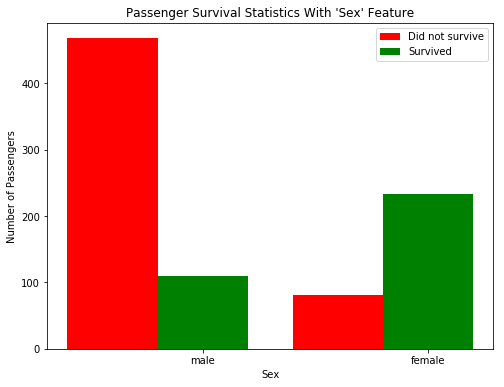

In [46]:
vs.survival_stats(data, outcomes, 'Sex')

In [62]:
def predictions_1(data):
    """ Model with one feature :
            - Predict a passenger survived if they are female."""
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex'] == 'male':
            predictions.append(0)
        else:
            predictions.append(1)
    
    # Return your predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

In [64]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


### merge two feature sex and age

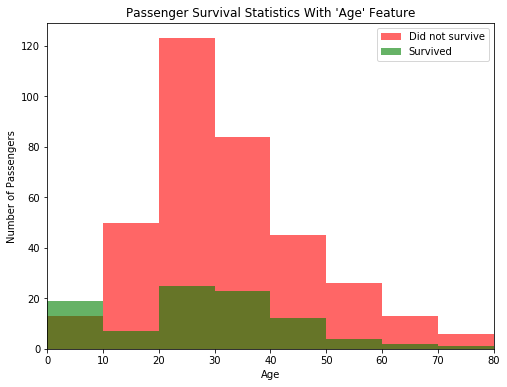

In [98]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [122]:
def predictions_2(data):
    """ Model with multiple features. Mskes a prediction with an accuracy of at least 80%. """
    predictions = []
    for _, passenger in data.iterrows():
        if  passenger['Sex']=='female':
            predictions.append(1)
        else:
            if passenger['Age'] < 10:
                predictions.append(1)
            else:
                predictions.append(0)
    return pd.Series(predictions)

predictions = predictions_2(data)

* all female passengers and all male passengers younger than 10 survived

In [123]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


### "Sex == 'male'", "Age < 18"

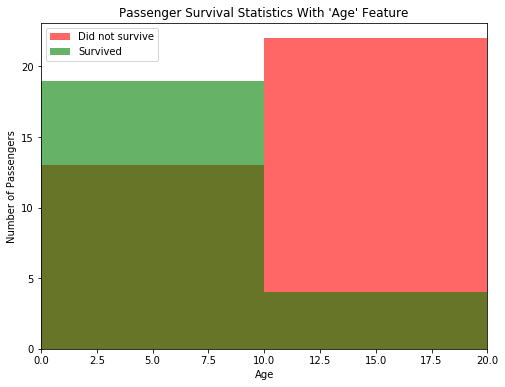

In [130]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 18"])

In [133]:
def predictions_3(data):
    """ Model with multiple features. Mskes a prediction with an accuracy of at least 80%. """
    predictions = []
    for _, passenger in data.iterrows():
        if  passenger['Sex']=='female':
            predictions.append(1)
        else:
            if passenger['Age'] < 18:
                predictions.append(1)
            else:
                predictions.append(0)
    return pd.Series(predictions)

predictions = predictions_3(data)

In [134]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 77.33%.


### Other feature

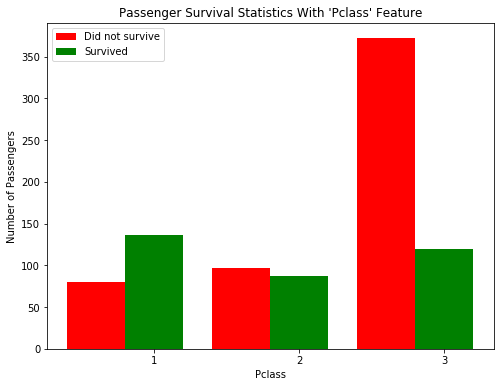

In [138]:
vs.survival_stats(data, outcomes, 'Pclass')

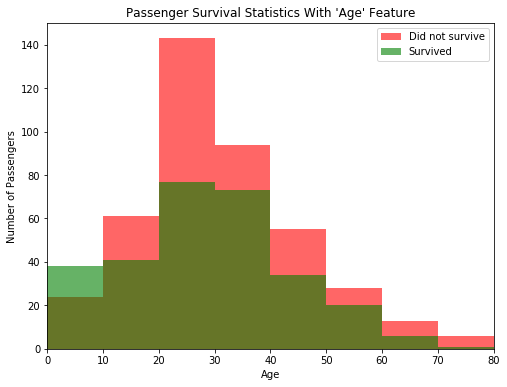

In [139]:
vs.survival_stats(data, outcomes, 'Age')

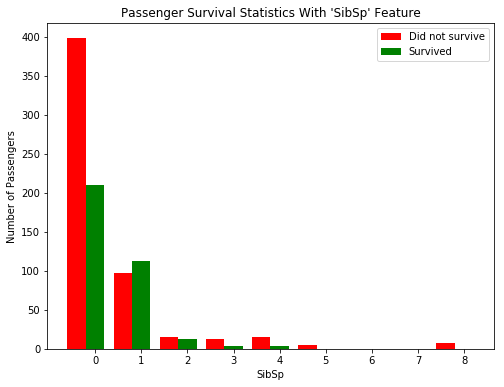

In [140]:
vs.survival_stats(data, outcomes, 'SibSp')

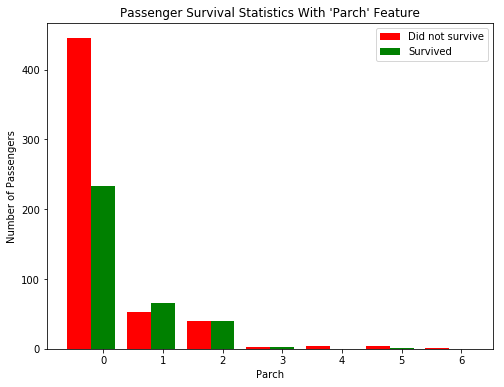

In [141]:
vs.survival_stats(data, outcomes, 'Parch')

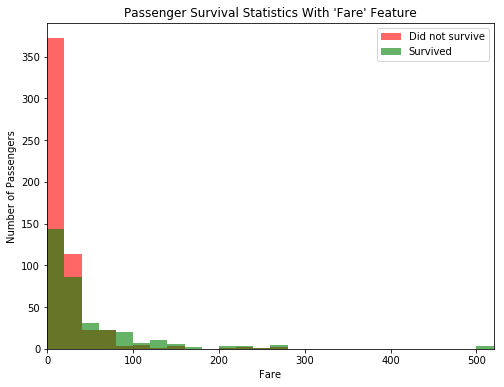

In [143]:
vs.survival_stats(data, outcomes, 'Fare')

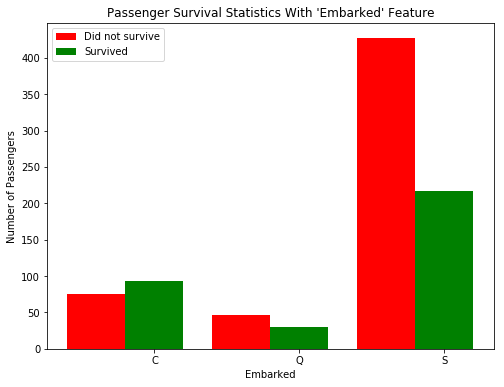

Passengers with missing 'Embarked' values: 2 (2 survived, 0 did not survive)


In [145]:
vs.survival_stats(data, outcomes, 'Embarked')